# Example if call LibRadTran from the notebook
=======================================================================

- Sylvie Dagoret-Campagne
- update 3rd Jun 2018

Compared libradtran scattering with analytic formula

In [198]:
import matplotlib.pyplot as plt
%matplotlib inline
import sys
import os

In [199]:
from scipy.interpolate import interp1d

In [200]:
from libatmscattering import *
from librtsimana import *
from libsimulateTranspLSSTScattAbsAer3 import *

In [201]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [202]:
airmasses=np.linspace(1.,2.,10.)
pressure = 782.5
pwv=4.0
aer=0
lambda0=500.
ozone=0.

/Users/dagoret/anaconda/envs/mypython3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """Entry point for launching an IPython kernel.


In [203]:
NBOBS=len(airmasses)

In [204]:
all_transmission=np.zeros((NBWL,NBOBS))
all_transmission_calc=np.zeros((NBWL,NBOBS))

In [205]:
idx=0
for am in airmasses:
    path,thefile=ProcessSimulationaer(am,pwv,ozone,lambda0,aer)
    #path,thefile=ProcessSimulation(am,pwv,ozone)
    data = np.loadtxt(os.path.join(path,thefile))
    wl = data[:,0]
    atm = data[:,1]  
    func=interp1d(wl,atm,kind='linear') 
    transm=func(WL)
    all_transmission[:,idx]=transm
    idx+=1

--------------------------------------------
 1) airmass =  1.0
 2) pwv =  4.0
 3) oz =  0.0
 4) wl0 =  500.0
 5) tau0 =  0
--------------------------------------------
Running uvspec with input file:  simulations/RT/2.0.1/LS/pp/us/sa/rt/in/RT_LS_pp_us_sa_rt_z10_wv40_oz0_aer0.INP
Output to file                :  simulations/RT/2.0.1/LS/pp/us/sa/rt/out/RT_LS_pp_us_sa_rt_z10_wv40_oz0_aer0.OUT
uvspec cmd:  /Users/dagoret/MacOSX/External/libRadtran/libRadtran-2.0.1/bin/uvspec  < simulations/RT/2.0.1/LS/pp/us/sa/rt/in/RT_LS_pp_us_sa_rt_z10_wv40_oz0_aer0.INP > simulations/RT/2.0.1/LS/pp/us/sa/rt/out/RT_LS_pp_us_sa_rt_z10_wv40_oz0_aer0.OUT
--------------------------------------------
 1) airmass =  1.11111111111
 2) pwv =  4.0
 3) oz =  0.0
 4) wl0 =  500.0
 5) tau0 =  0
--------------------------------------------
Running uvspec with input file:  simulations/RT/2.0.1/LS/pp/us/sa/rt/in/RT_LS_pp_us_sa_rt_z11_wv40_oz0_aer0.INP
Output to file                :  simulations/RT/2.0.1/LS/pp/us/sa/rt

In [211]:
cat simulations/RT/2.0.1/LS/pp/us/sa/rt/in/RT_LS_pp_us_sa_rt_z20_wv40_oz0_aer0.INP

aerosol_default 
aerosol_set_tau_at_wvl 500.0 0
albedo 0.2
altitude 2.75
atmosphere_file /Users/dagoret/MacOSX/External/libRadtran/libRadtran-2.0.1/data/atmmod/afglus.dat
data_files_path /Users/dagoret/MacOSX/External/libRadtran/libRadtran-2.0.1/data
mol_abs_param reptran coarse
mol_modify H2O 4.0 MM
mol_modify O3 0.0 DU
output_quantity reflectivity
output_user lambda edir
phi0 0
quiet 
rte_solver disort
source solar /Users/dagoret/MacOSX/External/libRadtran/libRadtran-2.0.1/data/solar_flux/kurudz_1.0nm.dat
sza 59.99999999999999
wavelength 250.0 1200.0


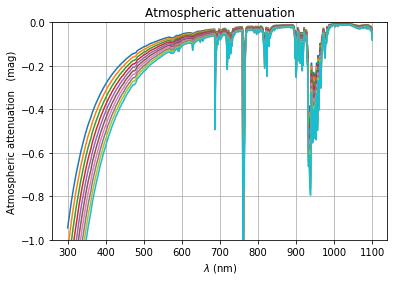

In [207]:
idx=0
for am in airmasses:
    plt.plot(WL,2.5*np.log10(all_transmission[:,idx]))
    idx+=1
plt.xlabel("$\lambda$ (nm)")
plt.ylabel("Atmospheric attenuation   (mag)")
plt.title("Atmospheric attenuation")
plt.ylim(-1.,0.)
plt.grid()

In [208]:
idx=0
for am in airmasses:
    altitude=LSST_Altitude*1000.*0.985  # Need to correct altitude
    OD=RayOptDepth_adiabatic(WL, altitude=altitude,costh= 1./am)

    all_transmission_calc[:,idx]=np.exp(-OD)
    idx+=1

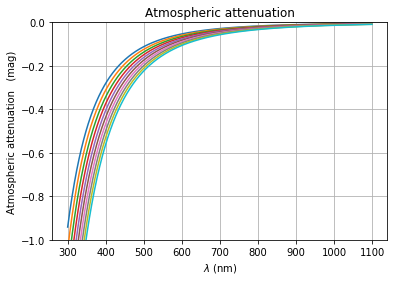

In [209]:
idx=0
for am in airmasses:
    plt.plot(WL,2.5*np.log10(all_transmission_calc[:,idx]))
    idx+=1
plt.xlabel("$\lambda$ (nm)")
plt.ylabel("Atmospheric attenuation   (mag)")
plt.title("Atmospheric attenuation")
plt.ylim(-1.,0.)
plt.grid()

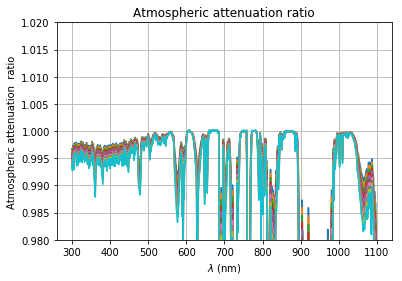

In [210]:
idx=0
for am in airmasses:
    plt.plot(WL,all_transmission[:,idx]/ all_transmission_calc[:,idx])
    idx+=1
plt.xlabel("$\lambda$ (nm)")
plt.ylabel("Atmospheric attenuation  ratio")
plt.title("Atmospheric attenuation ratio")
plt.ylim(0.98,1.02)
plt.grid()